In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import pandas as pd
import os

os.getcwd()
os.chdir('/content/gdrive/My Drive/Colab Notebooks/')


data = pd.read_csv('test_data.csv', encoding = 'utf-8')

print(data.head())

                                               topic  ...   url
0                Asking if the recipe can be changed  ...  none
1  \nBe wary of abstracting and uniformly concept...  ...  none
2  looking beyond what is known towards what is l...  ...  none
3  \nIn an information-based society, information...  ...  none
4  coping with climate change by reforming aid an...  ...  none

[5 rows x 6 columns]


In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#문장 전체에 대한 분석

## 데이터 길이 분석, 내용과 제목 모두의 길이를 분석하기 위해 하나의 리스트로 만들기

sentences = list(data['content']) + list(data['topic'])

### 문자 단위의 길이 분석(음절)

### 단어 단위의 길이 분석(어절)

### 형태소 단위의 길이 분석(형태소)

In [25]:
# 단어, 음절 분할

## 문장별 단어 단위 분할
tokenized_sentences = [s.split() for s in sentences]
print(tokenized_sentences)

## 문장별 단어의 갯수 (내용 지문의 단어 갯수와 선지의 단어 갯수가 나옴)
sent_len_by_token = [len(t) for t in tokenized_sentences]
print(sent_len_by_token)

## 문장별 음절의 갯수 (내용 지문의 음절 갯수와 선지의 음절 갯수가 나옴) 
sent_len_by_syllable = [len(s.replace(' ', '')) for s in sentences]
print(sent_len_by_syllable) 

[['Dear', 'Mr.', 'Reese,', 'A', 'few', 'days', 'ago,', 'I', 'submitted', 'my', 'application', 'and', 'recipe', 'for', 'the', '2nd', 'Annual', 'DC', 'Metro', 'Cooking', 'Contest.', 'However,', 'I', 'would', 'like', 'to', 'change', 'my', 'recipe', 'if', 'it', 'is', 'possible.', 'I', 'have', 'checked', 'the', 'website', 'again,', 'but', 'I', 'could', 'only', 'find', 'information', 'about', 'the', 'contest', 'date,', 'time,', 'and', 'prizes.', 'I', 'couldn’t', 'see', 'any', 'information', 'about', 'changing', 'recipes.', 'I', 'have', 'just', 'created', 'a', 'great', 'new', 'recipe,', 'and', 'I', 'believe', 'people', 'will', 'love', 'this', 'more', 'than', 'the', 'one', 'I', 'have', 'already', 'submitted.', 'Please', 'let', 'me', 'know', 'if', 'I', 'can', 'change', 'my', 'submitted', 'recipe.', 'I', 'look', 'forward', 'to', 'your', 'response'], ['War', 'is', 'inconceivable', 'without', 'some', 'image,', 'or', 'concept,', 'of', 'the', 'enemy.', 'It', 'is', 'the', 'presence', 'of', 'the', 'en

Text(0, 0.5, 'Number of Sentences')

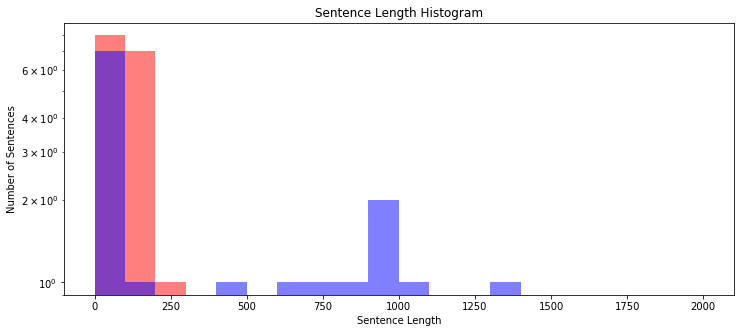

In [26]:
plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins = 20, range=[0,2000], alpha = 0.5, color = 'r', label = 'vocab')
plt.hist(sent_len_by_syllable, bins = 20, range = [0, 2000], alpha = 0.5, color = 'b', label = 'syllabe')

plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [27]:
print('어절 최대 길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이: {}'.format(np.median(sent_len_by_token)))
print('제 1사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이: 254
어절 최소 길이: 7
어절 평균 길이: 86.75
어절 길이 표준편차: 80.63
어절 중간 길이: 65.0
제 1사분위 길이: 10.0
제 3사분위 길이: 149.5


In [28]:
print('음절 최대 길이: {}'.format(np.max(sent_len_by_syllable)))
print('음절 최소 길이: {}'.format(np.min(sent_len_by_syllable)))
print('음절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_syllable)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_syllable)))
print('음절 중간 길이: {}'.format(np.median(sent_len_by_syllable)))
print('제 1사분위 길이: {}'.format(np.percentile(sent_len_by_syllable, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(sent_len_by_syllable, 75)))

음절 최대 길이: 1359
음절 최소 길이: 29
음절 평균 길이: 464.50
음절 길이 표준편차: 438.85
음절 중간 길이: 305.0
제 1사분위 길이: 49.5
제 3사분위 길이: 848.25


In [0]:
## 각 문장당 평균 단어의 길이: 86
## 각 문장당 편균 음절의 길이: 464

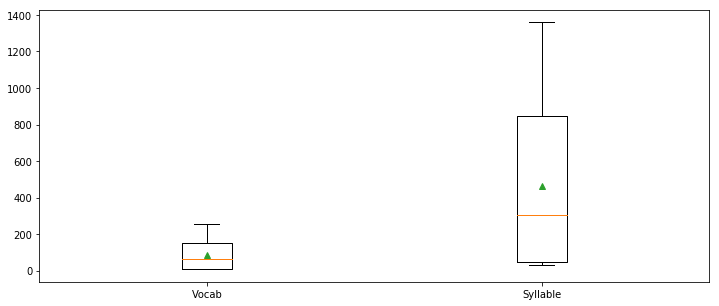

In [30]:
# Boxplot 

plt.figure(figsize = (12,5))
plt.boxplot([sent_len_by_token, sent_len_by_syllable],
           labels = ['Vocab', 'Syllable'], showmeans = True);

In [31]:
## 내용과 제목 각각에 대한 문장 길이 분포 분석

content_sentences = list(data['content'])
title_sentences = list(data['topic'])

# 음절 단위로 분할
content_tokenized_sentences = [s.replace(' ', '') for s in content_sentences]
title_tokenized_sentences = [s.replace(' ', '') for s in title_sentences]
print(content_tokenized_sentences)

# 음절의 갯수 
content_sent_len_by_syllable = [len(s.replace(' ', '')) for s in content_sentences]
title_sent_len_by_syllable = [len(s.replace(' ', '')) for s in title_sentences]
print(content_sent_len_by_syllable)



['DearMr.Reese,Afewdaysago,Isubmittedmyapplicationandrecipeforthe2ndAnnualDCMetroCookingContest.However,Iwouldliketochangemyrecipeifitispossible.Ihavecheckedthewebsiteagain,butIcouldonlyfindinformationaboutthecontestdate,time,andprizes.Icouldn’tseeanyinformationaboutchangingrecipes.Ihavejustcreatedagreatnewrecipe,andIbelievepeoplewilllovethismorethantheoneIhavealreadysubmitted.PleaseletmeknowifIcanchangemysubmittedrecipe.Ilookforwardtoyourresponse', 'Warisinconceivablewithoutsomeimage,orconcept,oftheenemy.Itisthepresenceoftheenemythatgivesmeaningandjustificationtowar.‘Warfollowsfromfeelingsofhatred’,wroteCarlSchmitt.‘Warhasitsownstrategic,tactical,andotherrulesandpointsofview,buttheyallpresupposethatthepoliticaldecisionhasalreadybeenmadeastowhotheenemyis’.Theconceptoftheenemyisfundamentaltothemoralassessmentofwar:‘Thebasicaimofanationatwarinestablishinganimageoftheenemyistodistinguishassharplyaspossibletheactofkillingfromtheactofmurder’.However,weneedtobecautiousaboutthinkingofwarandth

Text(0, 0.5, 'Number of Questions')

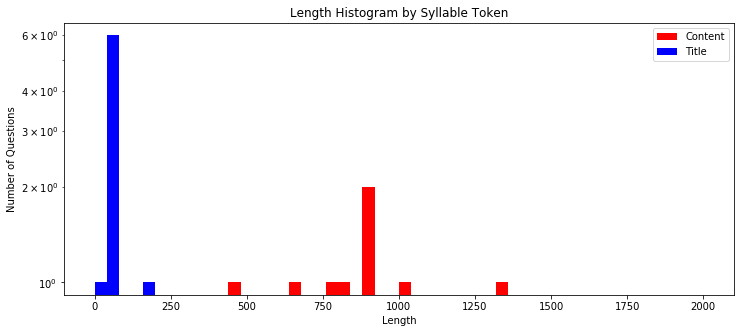

In [32]:
plt.figure(figsize = (12,5))
plt.hist(content_sent_len_by_syllable, bins = 50, range = [0, 2000], color = 'r', label = 'Content')
plt.hist(title_sent_len_by_syllable, bins = 50, range = [0, 2000], color = 'b', label = 'Title')
plt.legend()
plt.yscale('log', nonposy = 'clip')
plt.title('Length Histogram by Syllable Token')
plt.xlabel('Length')
plt.ylabel('Number of Questions')

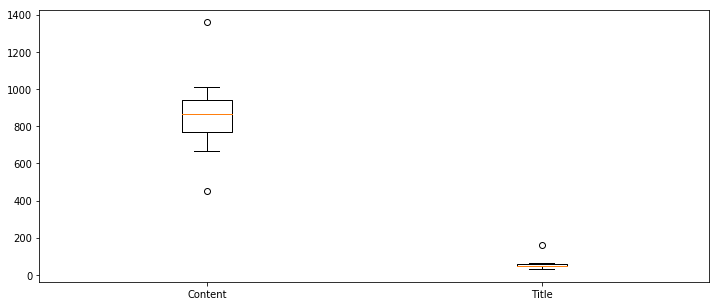

In [33]:
plt.figure(figsize = (12,5))
plt.boxplot([content_sent_len_by_syllable, title_sent_len_by_syllable], labels =['Content', 'Title']);

In [34]:
print('지문 음절 최대 길이: {}'.format(np.max(content_sent_len_by_syllable)))
print('지문 음절 최소 길이: {}'.format(np.min(content_sent_len_by_syllable)))
print('지문 음절 평균 길이: {:.2f}'.format(np.mean(content_sent_len_by_syllable)))
print('지문 음절 길이 표준편차: {:.2f}'.format(np.std(content_sent_len_by_syllable)))
print('지문 음절 중간 길이: {}'.format(np.median(content_sent_len_by_syllable)))
print('제 1사분위 길이: {}'.format(np.percentile(content_sent_len_by_syllable, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(content_sent_len_by_syllable, 75)))

지문 음절 최대 길이: 1359
지문 음절 최소 길이: 449
지문 음절 평균 길이: 866.38
지문 음절 길이 표준편차: 246.34
지문 음절 중간 길이: 865.5
제 1사분위 길이: 766.5
제 3사분위 길이: 938.5


In [35]:
print('선지 음절 최대 길이: {}'.format(np.max(title_sent_len_by_syllable)))
print('선지 음절 최소 길이: {}'.format(np.min(title_sent_len_by_syllable)))
print('선지 음절 평균 길이: {:.2f}'.format(np.mean(title_sent_len_by_syllable)))
print('선지 음절 길이 표준편차: {:.2f}'.format(np.std(title_sent_len_by_syllable)))
print('선지 음절 중간 길이: {}'.format(np.median(title_sent_len_by_syllable)))
print('제 1사분위 길이: {}'.format(np.percentile(title_sent_len_by_syllable, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(title_sent_len_by_syllable, 75)))

선지 음절 최대 길이: 161
선지 음절 최소 길이: 29
선지 음절 평균 길이: 62.62
선지 음절 길이 표준편차: 38.52
선지 음절 중간 길이: 49.0
제 1사분위 길이: 46.25
제 3사분위 길이: 61.0


## 해당 통계 자료를 보고 문장의 최대 길이 설정

디코더가 생성할 문장에 영향

중간 값 ~  3분위 값 주변이 좋음

답변의 길이를 한.. 61정도?

In [0]:
content_tokenized = nltk.word_tokenize(str(content_sentences))
title_tokenized = nltk.word_tokenize(str(title_sentences))

In [0]:
# 데이터 어휘 빈도 분석

## 품사 태깅 (동사, 명사, 형용사)

content_NVA_token_sentences = list()
title_NVA_token_sentences = list()

for s in content_sentences:
    for token, tag in nltk.pos_tag(content_tokenized):
        if tag == 'NN' or tag == 'NNP' or tag == 'NNS'or tag =='VBD' or tag == 'JJ' or tag == 'JJS' or tag == 'VB' or tag == 'VBG' or tag == 'VBN' or tag == 'VBP' or tag == 'VBZ':
            ## 부사 미포함,tag == 'RBS' or tag == 'RB'
            content_NVA_token_sentences.append(token)
            
for s in title_sentences:
    temp_token_bucket = list()
    for token, tag in nltk.pos_tag(title_tokenized):
        if tag == 'NN' or tag == 'NNP' or tag == 'NNS'or tag =='VBD' or tag == 'JJ' or tag == 'JJS' or tag == 'VB' or tag == 'VBG' or tag == 'VBN' or tag == 'VBP' or tag == 'VBZ':
            ## 부사는 미포함, tag == 'RBS' or tag == 'RB'
            title_NVA_token_sentences.append(token)
            
content_NVA_token_sentences = ' '.join(content_NVA_token_sentences) ## 동사 명사 형용사 제외 제거
title_NVA_token_sentences = ' '.join(title_NVA_token_sentences) ## 동사 명사 형용사 제외 제거

In [60]:
content_NVA_token_sentences

"Mr. Reese A few days submitted application recipe Annual DC Metro Cooking Contest like change recipe is possible have checked website find information contest date time prizes couldn ’ t see information changing recipes have created great new recipe believe people love one have submitted Please let know change submitted recipe look response is inconceivable image concept enemy is presence enemy gives meaning justification war ‘ War follows feelings hatred ’ wrote Carl Schmitt ‘ War has own strategic tactical other rules points view presuppose political decision has been made enemy is ’ concept enemy is fundamental moral assessment war ‘ basic aim nation war establishing image enemy is distinguish possible act killing act murder ’ need be cautious thinking war image enemy informs abstract uniform way Rather be seen cultural contingent phenomena are explicit goal best science be seen refining ignorance Scientists young ones get obsessed results Society helps mad chase Big discoveries ar

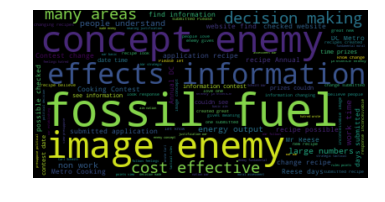

In [61]:
# 워드 클라우드화

content_wordcloud = WordCloud().generate(content_NVA_token_sentences)

plt.imshow(content_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

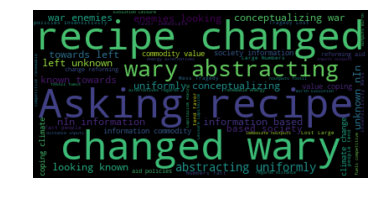

In [62]:
title_wordcloud = WordCloud().generate(title_NVA_token_sentences)

plt.imshow(title_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()